### Librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [2]:
# Configurar la visualización de gráficos inline
%matplotlib inline

## Datos

### importacion de CSV

In [3]:
data = pd.read_csv('../datos/brutos/data_EDA.csv')

In [4]:
data.sample(7, random_state = 5)

,Unnamed: 0,DX,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,MMSE,imputed_genotype,APOE Genotype,DX_SUB
326,326,AD,78.6,Male,20,Not Hisp/Latino,White,0,21,True,"3,3",AD
356,356,LMCI,73.5,Male,16,Not Hisp/Latino,White,0,30,True,"3,3",MCI
84,84,CN,74.1,Male,17,Not Hisp/Latino,White,0,30,True,"3,3",CN
623,623,LMCI,74.4,Female,12,Not Hisp/Latino,White,1,29,True,"3,4",MCI
473,473,LMCI,69.0,Female,8,Not Hisp/Latino,White,1,26,True,"3,4",MCI
99,99,CN,78.3,Female,14,Not Hisp/Latino,White,1,29,True,"3,4",CN
419,419,CN,83.1,Male,14,Not Hisp/Latino,White,0,30,True,"3,3",CN


In [5]:
data.drop('Unnamed: 0', axis=1, inplace=True)

### Cantidad de variables por tipo de datos

In [6]:
data.dtypes.value_counts()

object     7
int64      3
float64    1
Name: count, dtype: int64

In [7]:
data.dtypes

DX                   object
AGE                 float64
PTGENDER             object
PTEDUCAT              int64
PTETHCAT             object
PTRACCAT             object
APOE4                 int64
MMSE                  int64
imputed_genotype     object
APOE Genotype        object
DX_SUB               object
dtype: object

In [8]:
data.sample(4, random_state=3)

,DX,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,MMSE,imputed_genotype,APOE Genotype,DX_SUB
578,LMCI,76.2,Male,16,Not Hisp/Latino,White,0,26,True,"3,3",MCI
454,LMCI,72.3,Male,17,Not Hisp/Latino,White,0,30,True,"3,3",MCI
131,LMCI,79.4,Male,16,Not Hisp/Latino,White,1,30,True,"3,4",MCI
359,LMCI,74.0,Male,12,Not Hisp/Latino,White,2,29,True,"4,4",MCI


### Conversion de tipos de datos de las columnas

In [9]:
#Conversion de columnas tipo objeto con menos de 30 variables
data[['DX', 'PTGENDER', 'PTETHCAT', 'PTRACCAT', 'imputed_genotype','DX_SUB']] = data[['DX', 'PTGENDER', 'PTETHCAT', 'PTRACCAT', 'imputed_genotype','DX_SUB']].astype("category")

### Codificación

In [10]:
datos_codificados = pd.DataFrame(data)
#categoricos nominales
# Seleccionar las columnas de tipo object
columnas_nominales =['DX', 'PTGENDER', 'PTETHCAT', 'PTRACCAT', 'imputed_genotype','DX_SUB']

# Iterar sobre las columnas seleccionadas y aplicar la codificación
for column in columnas_nominales:
    encoder = LabelEncoder()
    datos_codificados[column] = encoder.fit_transform(datos_codificados[column])

#Se ordenan por edad
datos_codificados = datos_codificados.sort_values(by="AGE", ascending=False)

In [11]:
#categoricos ordinales
#Codificamos los datos 'APEO Genotype' de string a float

datos_codificados["APOE Genotype"] = [float(str(i).replace(",", ".")) for i in data["APOE Genotype"]]



In [12]:
datos_codificados.head()

,DX,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,MMSE,imputed_genotype,APOE Genotype,DX_SUB
310,1,89.6,0,16,1,2,0,30,1,3.4,1
90,2,89.3,1,13,1,2,0,26,1,3.3,2
138,0,89.1,0,20,1,2,0,26,1,3.3,0
205,2,88.8,1,11,1,2,0,26,1,3.3,2
407,1,88.6,0,20,1,2,0,30,0,3.4,1


In [13]:
datos_codificados.dtypes

DX                    int64
AGE                 float64
PTGENDER              int64
PTEDUCAT              int64
PTETHCAT              int64
PTRACCAT              int64
APOE4                 int64
MMSE                  int64
imputed_genotype      int64
APOE Genotype       float64
DX_SUB                int64
dtype: object

### Escalamiento

In [14]:
# Escalamiento selectivo
scaler = MinMaxScaler()
datos_escalados = datos_codificados.copy()
datos_escalados = scaler.fit_transform(datos_codificados)

In [15]:
datos_escalados = pd.DataFrame(datos_escalados, columns=datos_codificados.columns)

In [16]:
datos_escalados

,DX,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,MMSE,imputed_genotype,APOE Genotype,DX_SUB
0,0.5,1.000000,0.0,0.714286,0.5,1.0,0.0,1.0,0.5,0.545455,0.5
1,1.0,0.991304,1.0,0.500000,0.5,1.0,0.0,0.6,0.5,0.500000,1.0
2,0.0,0.985507,0.0,1.000000,0.5,1.0,0.0,0.6,0.5,0.500000,0.0
3,1.0,0.976812,1.0,0.357143,0.5,1.0,0.0,0.6,0.5,0.500000,1.0
4,0.5,0.971014,0.0,1.000000,0.5,1.0,0.0,1.0,0.0,0.545455,0.5
...,...,...,...,...,...,...,...,...,...,...,...
623,0.0,0.037681,1.0,0.714286,0.5,1.0,1.0,0.3,0.5,0.545455,0.0
624,1.0,0.031884,0.0,0.857143,0.0,1.0,0.0,0.4,0.0,0.545455,1.0
625,1.0,0.002899,0.0,0.857143,0.5,1.0,0.0,0.5,0.5,0.500000,1.0
626,0.0,0.000000,0.0,0.857143,0.5,1.0,0.0,0.4,0.0,0.500000,0.0


### Proporcion entre variables categoricas

In [17]:
data.sample(3, random_state=3)

,DX,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,MMSE,imputed_genotype,APOE Genotype,DX_SUB
578,LMCI,76.2,Male,16,Not Hisp/Latino,White,0,26,True,"3,3",MCI
454,LMCI,72.3,Male,17,Not Hisp/Latino,White,0,30,True,"3,3",MCI
131,LMCI,79.4,Male,16,Not Hisp/Latino,White,1,30,True,"3,4",MCI


In [18]:
data['APOE Genotype'] = data['APOE Genotype'].str.replace(',', '.')
data['APOE Genotype'] = data['APOE Genotype'].astype(float)

In [19]:
#Discretizando columnas
datos_discretizados = data.copy()
datos_discretizados.describe()

,AGE,PTEDUCAT,APOE4,MMSE,APOE Genotype
count,628.000000,628.000000,628.000000,628.000000,628.000000
mean,75.169586,15.616242,0.598726,26.920382,3.365764
std,6.687429,2.977993,0.683456,2.562152,0.478158
min,55.100000,6.000000,0.000000,20.000000,2.200000
25%,71.200000,13.000000,0.000000,25.000000,3.300000
50%,75.450000,16.000000,0.000000,27.000000,3.300000
75%,80.000000,18.000000,1.000000,29.000000,3.400000
max,89.600000,20.000000,2.000000,30.000000,4.400000


In [20]:
# Discetizando AGE con 3.5 de paso
# Definir los límites de los rangos
bins = np.arange(55, 90.1, 3.5)

# Definir las etiquetas para cada rango (opcional)
labels = [f'{i}-{i+3.5}' for i in np.arange(55, 90, 3.5)]

# Utilizar la función cut para discretizar la columna
datos_discretizados['age_discretizada'] = pd.cut(datos_discretizados['AGE'], bins=bins, labels=labels)
datos_discretizados.drop('AGE', axis=1, inplace=True)

In [21]:
# Discretizacion de columna PTEDUCAT, con un paso de 1.4
# Definir los límites de los rangos
bins = np.arange(6, 20, 1.4)

# Definir las etiquetas para cada rango (una menos que los bordes)
labels = [f'{i}-{i+1.4}' for i in bins[:-1]]

# Utilizar la función cut para discretizar la columna
datos_discretizados['pteducat_discretizada'] = pd.cut(datos_discretizados['PTEDUCAT'], bins=bins, labels=labels)
datos_discretizados.drop('PTEDUCAT', axis=1, inplace=True)

In [22]:
# Discretizacion de columna APOE4, con un paso de 0.20
# Definir los límites de los rangos
bins = np.arange(0.0, 2.0, 0.2)

# Definir las etiquetas para cada rango (una menos que los bordes)
labels = [f'{i}-{i+1.4}' for i in bins[:-1]]

# Utilizar la función cut para discretizar la columna
datos_discretizados['apoe_four_discretizada'] = pd.cut(datos_discretizados['APOE4'], bins=bins, labels=labels)
datos_discretizados.drop('APOE4', axis=1, inplace=True)

In [23]:
# Discretizacion de la columna MMSE con un paso de 1
# Definir los límites de los rangos
bins = np.arange(20, 30, 1)

# Definir las etiquetas para cada rango (una menos que los bordes)
labels = [f'{i}-{i+1.4}' for i in bins[:-1]]

# Utilizar la función cut para discretizar la columna
datos_discretizados['mse_discretizada'] = pd.cut(datos_discretizados['MMSE'], bins=bins, labels=labels)
datos_discretizados.drop('MMSE', axis=1, inplace=True)

In [24]:
# Discretizacion de columna 'APOE Genotype' con un paso de 0.2
# Definir los límites de los rangos
bins = np.arange(2.2, 4.4, 0.2)

# Definir las etiquetas para cada rango (una menos que los bordes)
labels = [f'{i}-{i+1.4}' for i in bins[:-1]]

# Utilizar la función cut para discretizar la columna
datos_discretizados['apoe_genotype_discretizada'] = pd.cut(datos_discretizados['APOE Genotype'], bins=bins, labels=labels)
datos_discretizados.drop('APOE Genotype', axis=1, inplace=True)

In [25]:
datos_discretizados.dtypes

DX                            category
PTGENDER                      category
PTETHCAT                      category
PTRACCAT                      category
imputed_genotype              category
DX_SUB                        category
age_discretizada              category
pteducat_discretizada         category
apoe_four_discretizada        category
mse_discretizada              category
apoe_genotype_discretizada    category
dtype: object

In [26]:
columnas = datos_discretizados.columns
for col in columnas:
    datos_discretizados[col] = datos_discretizados[col].astype('category')

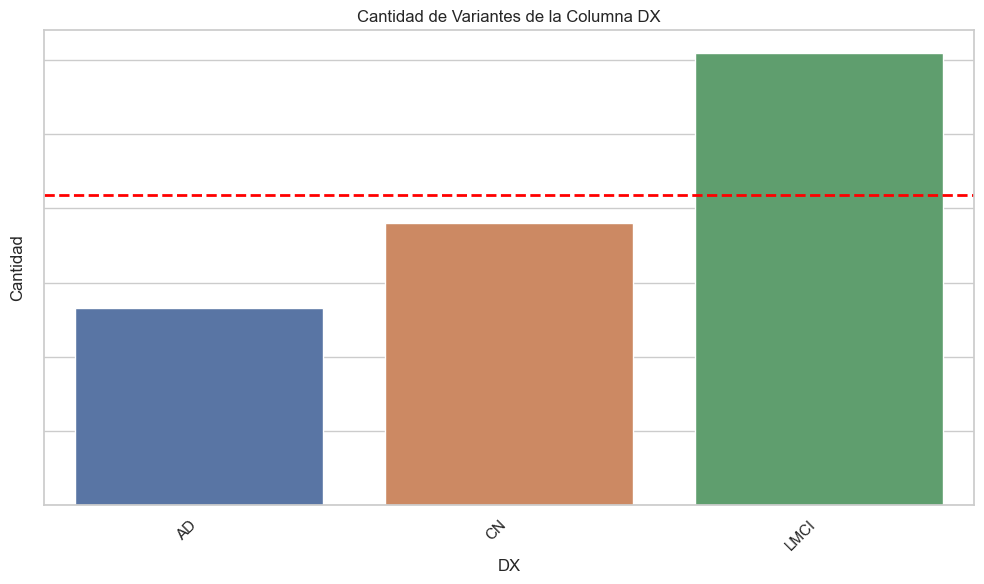

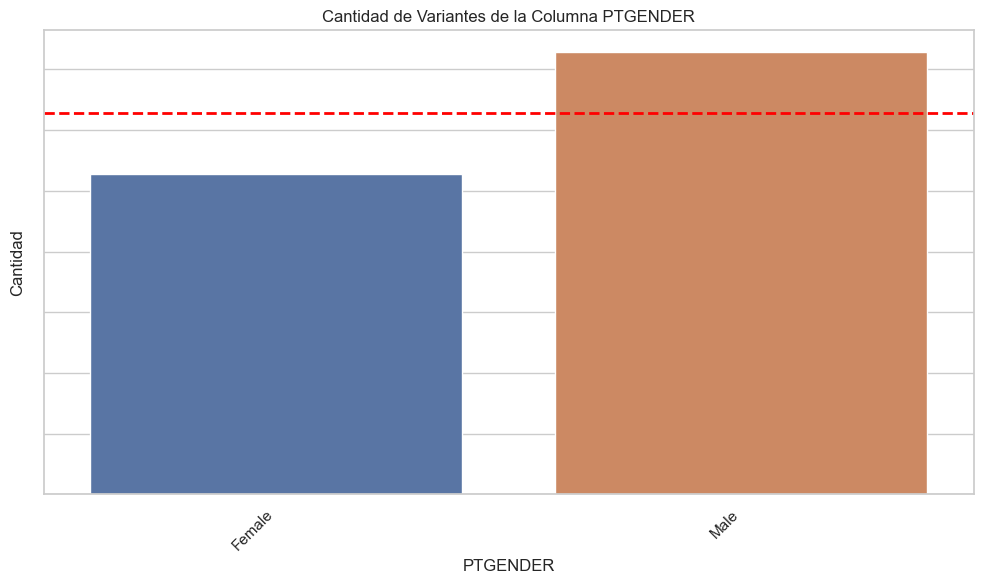

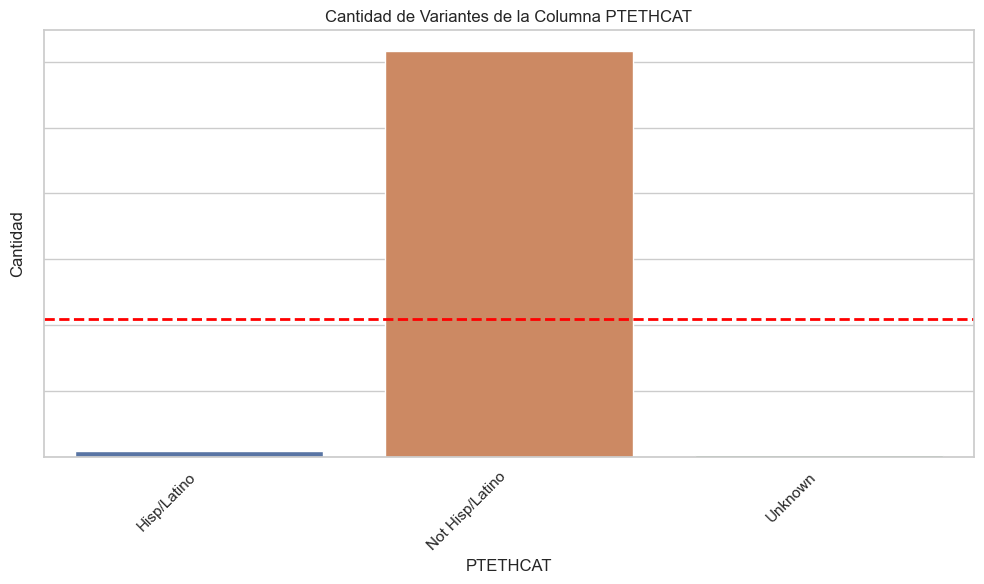

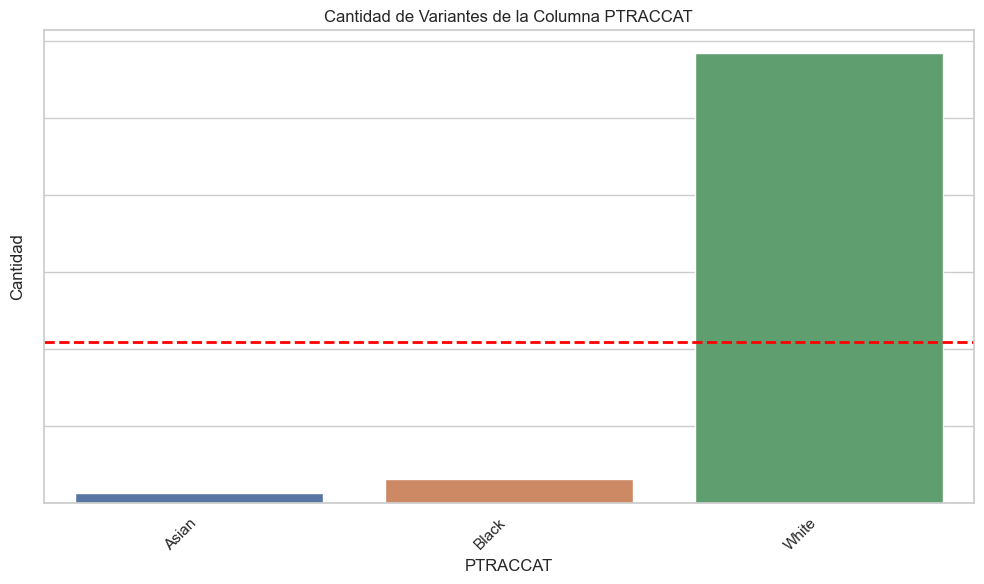

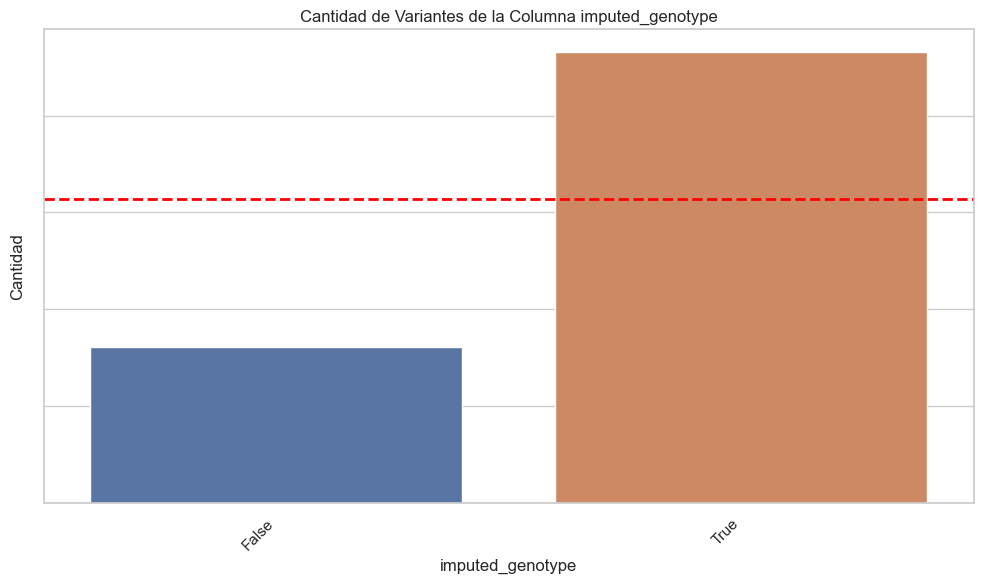

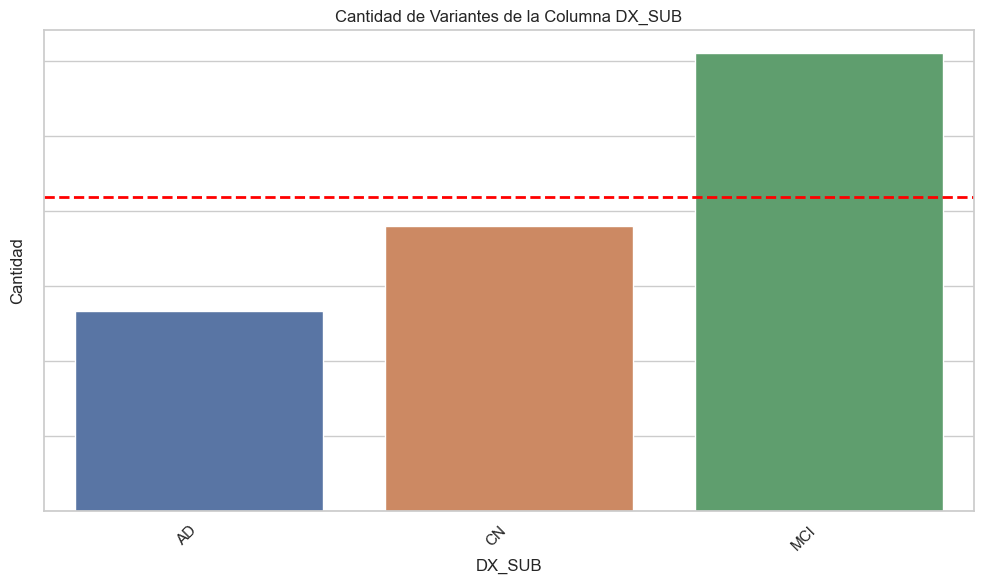

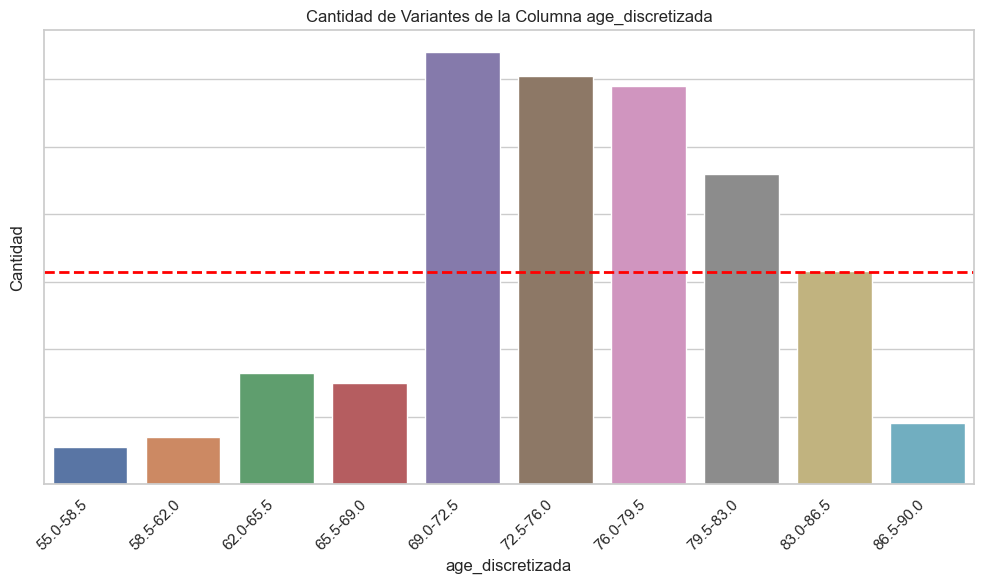

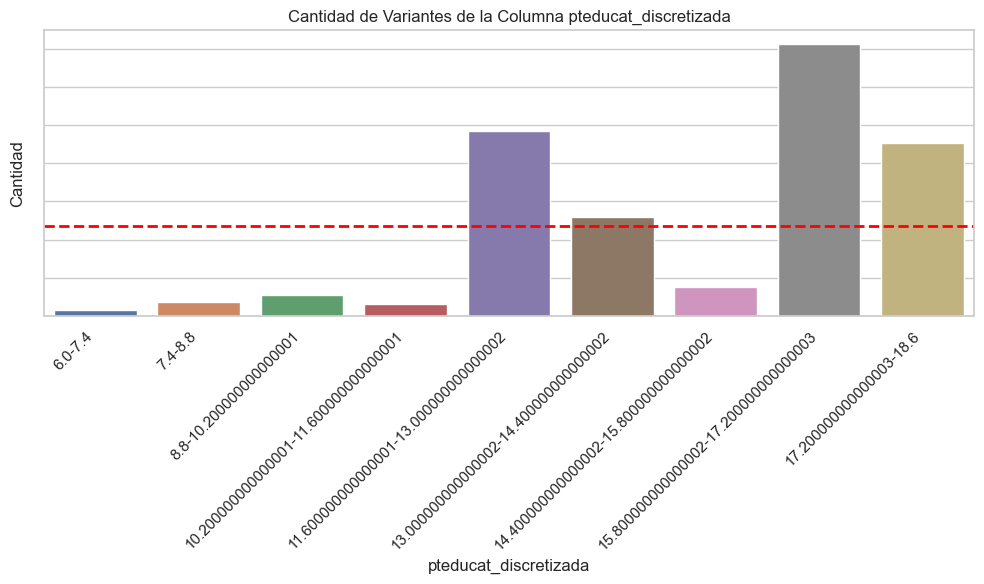

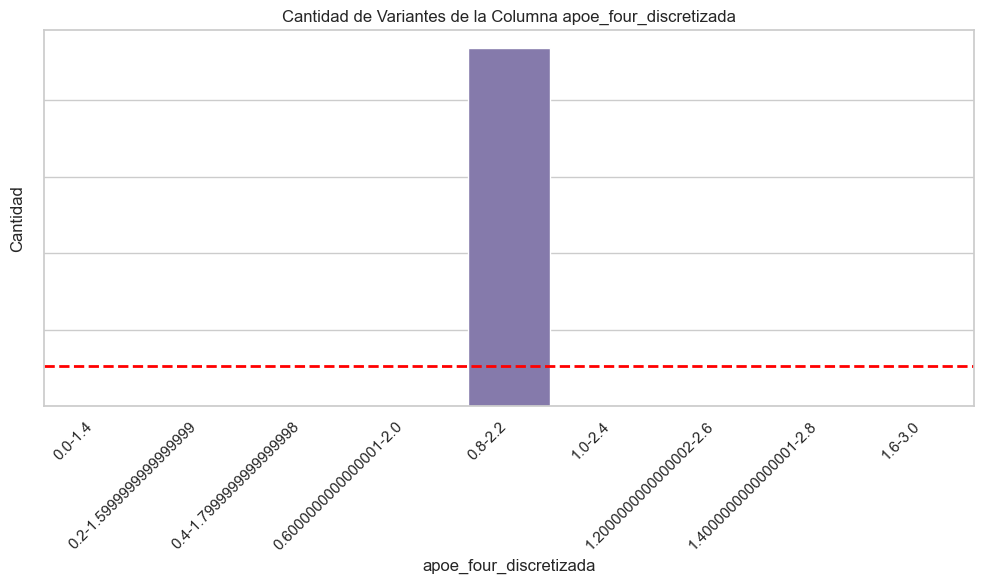

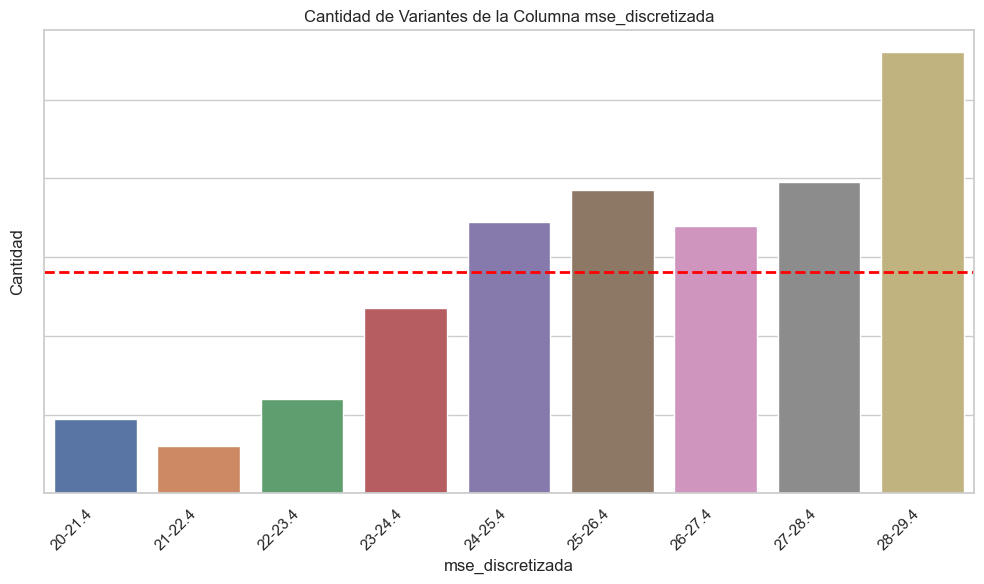

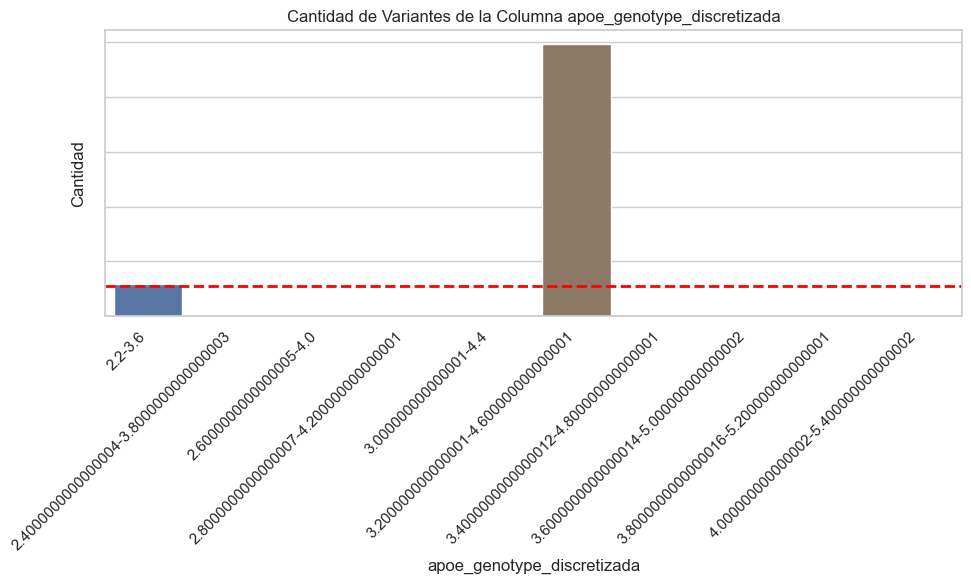

In [30]:
for columna in datos_discretizados.columns:
    # Configurar el estilo del gráfico
    sns.set(style='whitegrid')
    plt.figure(figsize=(10, 6))
    # Contar las variantes de la columna categórica
    variant_counts = datos_discretizados[columna].value_counts()

    # Crear el gráfico de barras
    ax = sns.barplot(x=variant_counts.index, y=variant_counts.values)

    plt.title(f'Cantidad de Variantes de la Columna {columna}')
    plt.xlabel(columna)
    plt.ylabel('Cantidad')
    # Agregar línea roja en la media de los datos
    valor_media = variant_counts.values.mean()

    ax.axhline(valor_media, color='red', linestyle='dashed', linewidth=2)

    # Ajustar etiquetas del eje x y eje y para que sean legibles
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_yticklabels([])  # Quitar etiquetas del eje y

    plt.tight_layout()
    plt.show()


### Estadisticas generales

In [ ]:
data.describe(include=['category', 'object', 'int64', 'float64'])

### Correlacion

In [ ]:
matriz_correlacion_data = data_datos_escalados[['data_accesibilidad','data_via_nombre','data_via_clase','data_via_numero','data_distrito','data_codigo_postal']].corr()

In [ ]:
mask = np.triu(np.ones_like(matriz_correlacion_data, dtype=bool))
# Crear el mapa de calor con la mitad de la matriz
plt.figure(figsize=(18, 15))
sns.heatmap(matriz_correlacion_data, mask=mask, annot=True, cmap='coolwarm')
plt.show()

### Guardado de CSV

In [ ]:
data.to_csv('../datos/procesados/2022_madrid_data.csv', index=True)
data_datos_escalados.to_csv('../datos/procesados/2022_madrid_data_datos_escalados.csv', index=True)

## Accidentes

### Importacion de CSV

In [ ]:
#desde colab
# Subir el archivo CSV desde tu sistema local
uploaded = files.upload()

# Leer el archivo CSV en un DataFrame
nombre_archivo = list(uploaded.keys())[0]  # Obtener el nombre del archivo subido
accidentes = pd.read_csv(io.BytesIO(uploaded[nombre_archivo]))

In [ ]:
accidentes = pd.read_csv('../datos/procesados/2022_madrid_accidentalidad.csv')

In [ ]:
accidentes.sample(5, random_state=4)

### Cantidad de variables por tipo de datos

In [ ]:
accidentes.dtypes.value_counts()

### Proporcion entre variables categoricas

In [ ]:
# Crear los rangos y las etiquetas
labels = ["{0} - {1}".format(i, i+20) for i in range(0, 540, 20)]

# Corrección en el rango para pd.cut()
accidentes['accidentes_via_numero_grupo'] = pd.cut(accidentes['accidentes_via_numero'], range(0, 541, 20), right=False, labels=labels)

In [ ]:
columnas_graficar = ['accidentes_hora', 'accidentes_via_nombre', 'accidentes_via_numero_grupo', 'accidentes_via_tipo', 'accidentes_distrito']

hora_categoria = accidentes['accidentes_hora'].value_counts()
nombre_via_top_treinta = accidentes['accidentes_via_nombre'].value_counts().head(30) #Solo los 30 con mas valores
numero = accidentes['accidentes_via_numero_grupo'].value_counts()
tipo_via = accidentes['accidentes_via_tipo'].value_counts()
distrito = accidentes['accidentes_distrito'].value_counts()

diccionario = {'accidentes_hora': hora_categoria,
               'accidentes_via_nombre': nombre_via_top_treinta,
               'accidentes_via_numero_grupo': numero,
               'accidentes_via_clase': tipo_via,
               'accidentes_distrito': distrito}

for columna in diccionario.keys():
    if columna in columnas_graficar:
        sns.set(style='whitegrid')
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(x=diccionario[columna].index, y=diccionario[columna].values)
        plt.title(f'Cantidad de Variantes de la Columna {columna}')
        plt.xlabel(columna)
        plt.ylabel('Cantidad')
        valor_media = diccionario[columna].values.mean()  # Corrección aquí
        ax.axhline(valor_media, color='red', linestyle='dashed', linewidth=2)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        ax.set_yticklabels(ax.get_yticklabels(), rotation=45, ha='right')
        plt.tight_layout()
        plt.show()


### Codificacion

In [ ]:
accidentes_datos_codificados = pd.DataFrame(accidentes)
#categoricos nominales
# Seleccionar las columnas de tipo object
columnas_nominales =['accidentes_via_nombre', 'accidentes_via_tipo', 'accidentes_distrito', 'accidentes_via_numero_grupo']

# Iterar sobre las columnas seleccionadas y aplicar la codificación
for column in columnas_nominales:
    encoder = LabelEncoder()
    accidentes_datos_codificados[column] = encoder.fit_transform(accidentes_datos_codificados[column])

#Se ordenan por distrito
accidentes_datos_codificados = accidentes_datos_codificados.sort_values(by="accidentes_distrito", ascending=False)

### Escalamiento

In [ ]:
accidentes.info()

In [ ]:
# Escalamiento selectivo
scaler = MinMaxScaler()
accidentes_datos_escalados = accidentes_datos_codificados.copy()
accidentes_datos_escalados[['accidentes_hora','accidentes_via_nombre','accidentes_via_numero_grupo','accidentes_via_tipo','accidentes_distrito']] = scaler.fit_transform(accidentes_datos_escalados[['accidentes_hora','accidentes_via_nombre','accidentes_via_numero_grupo','accidentes_via_tipo','accidentes_distrito']])

### Estadisticas basicas

In [ ]:
accidentes.describe(include=['object','int64', 'int32', 'category'])

### Correlacion

In [ ]:
accidentes_matriz_correlacion = accidentes_datos_escalados.corr()

In [ ]:
mask = np.triu(np.ones_like(accidentes_matriz_correlacion, dtype=bool))
# Crear el mapa de calor con la mitad de la matriz
plt.figure(figsize=(18, 15))
sns.heatmap(accidentes_matriz_correlacion, mask=mask, annot=True, cmap='coolwarm')
plt.show()

### Guardado de CSV

In [ ]:
accidentes.to_csv('../datos/procesados/2022_madrid_accidentalidad.csv', index = True)
accidentes_datos_escalados.to_csv('../datos/procesados/2022_madrid_accidentalidad_escalados.csv', index = True)